In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

### Basic Image IO and converter

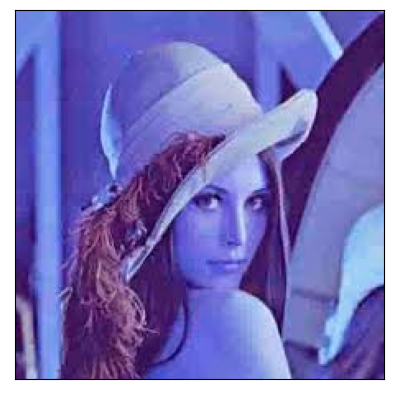

In [3]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

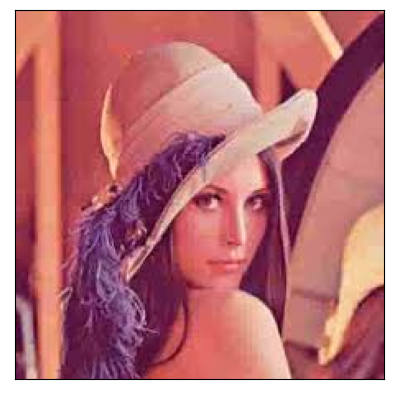

In [8]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR into RGB
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()

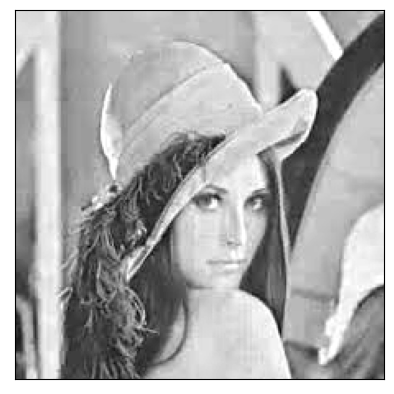

In [9]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # Convert BGR into HSV
plt.imshow(img_hsv[:,:,2], cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

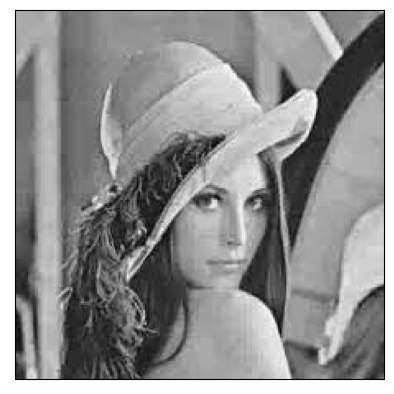

In [10]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)  # Convert BGR into HLS
plt.imshow(img_hls[:,:,1], cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

Check https://en.wikipedia.org/wiki/HSL_and_HSV for HSV HSL color system

In [11]:
def bgr_to_rgb(channel):
    """
    Change one BRG channel to HSV channel.
    :param channel: [B, G, R] of a point in image.
    :return: [R, G, B]
    """
    b = channel[0]
    g = channel[1]
    r = channel[2]
    return [r, g, b]

*You can also directly use* `return channel[::-1]`

### Practice image converting by yourself!
Ref: https://en.wikipedia.org/wiki/HSL_and_HSV#General_approach

1. Convert RGB from [0, 255] to [0, 1]
2. Calculate HSV
   https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor

In [12]:
def bgr_to_hsv(channel):
    """
        Change one BRG channel to HSV channel.
        :param channel: [R, G, B] of a point in image.
        :return: HSV channel
    """
    b, g, r = channel[0] / 255.0, channel[1] / 255.0, channel[2] / 255.0
    M = max(r, g, b)
    m = min(r, g, b)
    C = M - m

    v = M  # value
    if m == M:
        return 0.0, 0.0, v
    s = C / M
    rc = (M - r) / C
    gc = (M - g) / C
    bc = (M - b) / C
    if r == M:
        h = bc - gc
    elif g == M:
        h = 2.0 + rc - bc
    else:
        h = 4.0 + gc - rc

    h = (h / 6.0) % 1.0
    return [h * 180, s * 255, v * 255]

In [13]:
def hsv_to_rgb(channel):
    h = channel[0] / 180.0
    s = channel[1] / 255.0
    v = channel[2] / 255.0
    if s == 0.0:
        return v, v, v
    i = int(h*6.0) # XXX assume int() truncates!
    f = (h*6.0) - i
    p = v*(1.0 - s)
    q = v*(1.0 - s*f)
    t = v*(1.0 - s*(1.0-f))
    i = i%6
    rgb = []
    if i == 0:
        rgb = [v, t, p]
    if i == 1:
        rgb = [q, v, p]
    if i == 2:
        rgb = [p, v, t]
    if i == 3:
        rgb = [p, q, v]
    if i == 4:
        rgb = [t, p, v]
    if i == 5:
        rgb = [v, p, q]
    rgb = [i * 255 for i in rgb]
    return rgb

In [14]:
def bgr_to_hls(channel):
    channel = channel / 255.0
    b = channel[0]
    g = channel[1]
    r = channel[2]
    maxc = max(r, g, b)
    minc = min(r, g, b)
    # XXX Can optimize (maxc+minc) and (maxc-minc)
    l = (minc+maxc)/2.0
    if minc == maxc:
        return 0.0, l, 0.0
    if l <= 0.5:
        s = (maxc-minc) / (maxc+minc)
    else:
        s = (maxc-minc) / (2.0-maxc-minc)
    rc = (maxc-r) / (maxc-minc)
    gc = (maxc-g) / (maxc-minc)
    bc = (maxc-b) / (maxc-minc)
    if r == maxc:
        h = bc-gc
    elif g == maxc:
        h = 2.0+rc-bc
    else:
        h = 4.0+gc-rc
    h = (h/6.0) % 1.0
    return [h * 180, l * 255, s * 255]

In [15]:
ONE_THIRD = 1.0/3.0
ONE_SIXTH = 1.0/6.0
TWO_THIRD = 2.0/3.0

def _v(m1, m2, hue):
    hue = hue % 1.0
    if hue < ONE_SIXTH:
        return m1 + (m2-m1)*hue*6.0
    if hue < 0.5:
        return m2
    if hue < TWO_THIRD:
        return m1 + (m2-m1)*(TWO_THIRD-hue)*6.0
    return m1


def hls_to_rgb(channel):
    h = channel[0] / 180.0
    l = channel[1] / 255.0
    s = channel[2] / 255.0
    if s == 0.0:
        return l, l, l
    if l <= 0.5:
        m2 = l * (1.0+s)
    else:
        m2 = l+s-(l*s)
    m1 = 2.0*l - m2
    rgb = (_v(m1, m2, h+ONE_THIRD), _v(m1, m2, h), _v(m1, m2, h-ONE_THIRD))
    rgb = [i * 255 for i in rgb]
    return rgb

In [16]:
def trans_pixels(img, trans_type):
    print(img.shape)
    height = img.shape[0]
    width = img.shape[1]
    channels = img.shape[2]
    print("height:%s,width:%s,channels:%s" % (height,width,channels))
    print(img.size)
    for row in range(height):    #遍历每一行
        for col in range(width): #遍历每一列
            if trans_type == "BGR2RGB":
                img[row][col] = bgr_to_rgb(img[row][col])
            if trans_type == "BGR2HSV":
                img[row][col] = bgr_to_hsv(img[row][col])
            if trans_type == "BGR2HLS":
                img[row][col] = bgr_to_hls(img[row][col])
            if trans_type == "HSV2RGB":
                img[row][col] = hsv_to_rgb(img[row][col])
            if trans_type == "HLS2RGB":
                img[row][col] = hls_to_rgb(img[row][col])
    return img

(225, 225, 3)
height:225,width:225,channels:3
151875


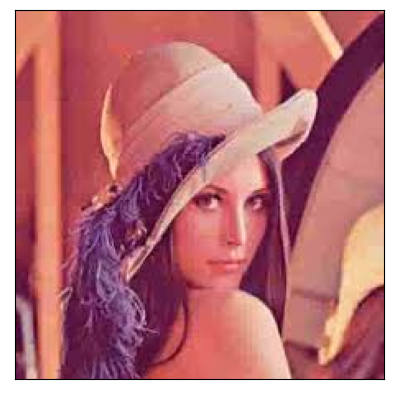

In [17]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = trans_pixels(img, "BGR2RGB")
plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

(225, 225, 3)
height:225,width:225,channels:3
151875


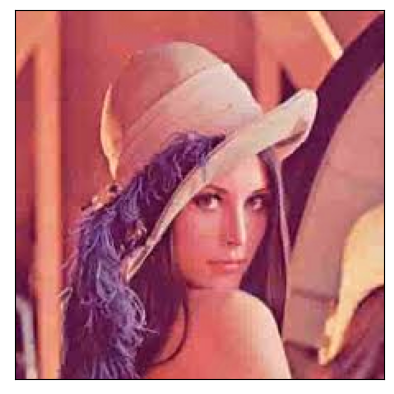

In [18]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = trans_pixels(img, "BGR2HSV")
img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

(225, 225, 3)
height:225,width:225,channels:3
151875
(225, 225, 3)
height:225,width:225,channels:3
151875


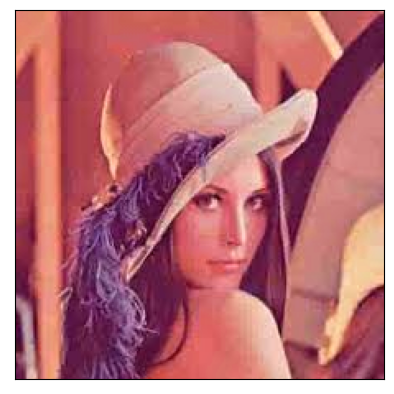

In [19]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = trans_pixels(img, "BGR2HSV")
img = trans_pixels(img, "HSV2RGB")
plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

(225, 225, 3)
height:225,width:225,channels:3
151875


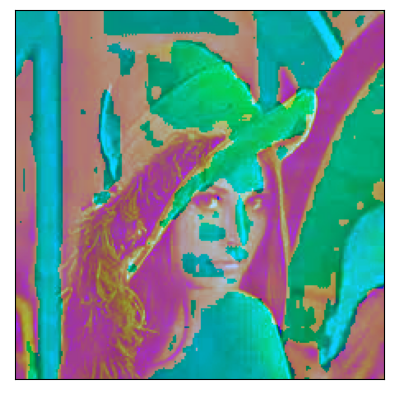

In [20]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = trans_pixels(img, "BGR2HLS")
plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

(225, 225, 3)
height:225,width:225,channels:3
151875
(225, 225, 3)
height:225,width:225,channels:3
151875


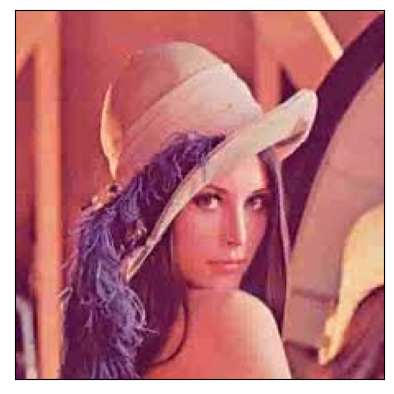

In [21]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = trans_pixels(img, "BGR2HLS")
img = trans_pixels(img, "HLS2RGB")
plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### Let's draw something!

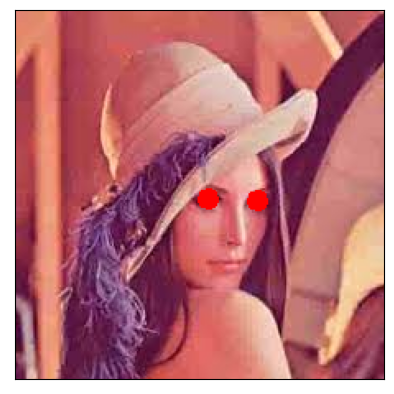

In [22]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a circle
cv2.circle(img, center = (117, 115), radius =3, color = (255, 0, 0), thickness = 5)
cv2.circle(img, center = (147, 116), radius =3, color = (255, 0, 0), thickness = 5)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

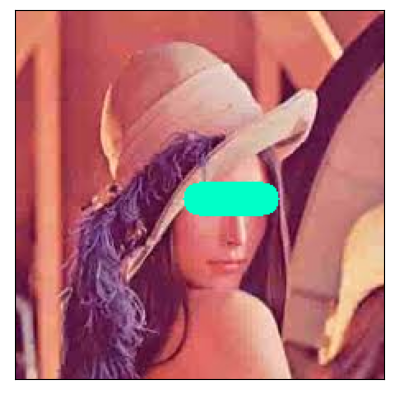

In [42]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a circle
cv2.line(img, pt1 = (112, 115), pt2 = (150, 115), color = (0, 255, 200), thickness = 20)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

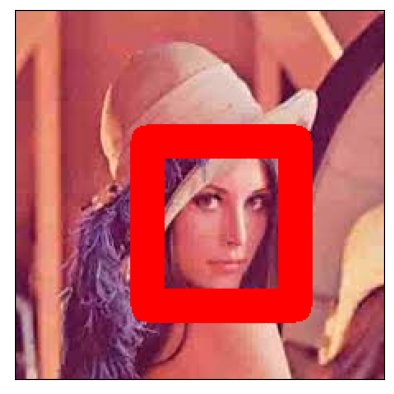

In [44]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a rectangle
cv2.rectangle(img, pt1 = (80, 80), pt2 =(170, 180), color = (255, 0, 0), thickness = 20)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [25]:
def dot_pixel(img, x, y, color, thickness):
    height = img.shape[0]
    width = img.shape[1]
    x = x - thickness
    y = y - thickness
    length = 2 * thickness + 1
    x = [0, x][x > 0]
    y = [0, y][y > 0]
    x = [width - length, x][x + length < width]
    y = [height - length, y][y + length < height]
    for i in range(length):
        for j in range(length):
            img[x+i][y+j] = color
    return img

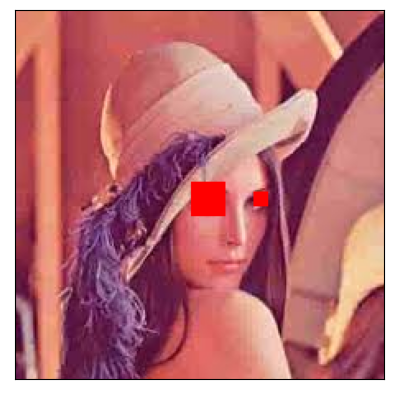

In [45]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a dot
img = dot_pixel(img, 115, 117, color=(255, 0, 0), thickness=10)
img = dot_pixel(img, 115, 149, color=(255, 0, 0), thickness=4)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

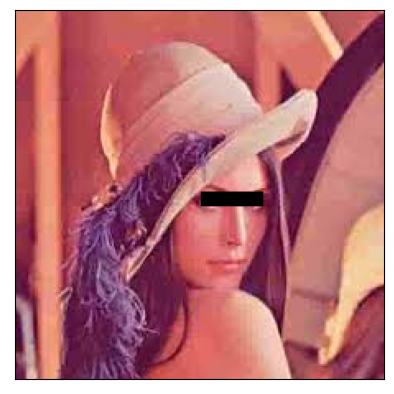

In [27]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a line
pt = [115, 117]
length = 30
for i in range(length):
    img = dot_pixel(img, pt[0], pt[1]+i, color=(0, 0, 0), thickness=4)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [28]:
def line_pixel(img, pt1, pt2, dense, color, thickness):
    points = [[pt1, pt2]]
    img = dot_pixel(img, pt1[0], pt1[1], color, thickness)
    img = dot_pixel(img, pt2[0], pt2[1], color, thickness)
    k = 1
    while(dense):
        for i in range(k):
            item = points.pop(0)
            mid = [(item[0][0] + item[1][0])//2, (item[0][1] + item[1][1])//2]
            img = dot_pixel(img, mid[0], mid[1], color, thickness)
            points.append([item[0], mid])
            points.append([mid, item[1]])
        k = k * 2
        dense -= 1
    return img

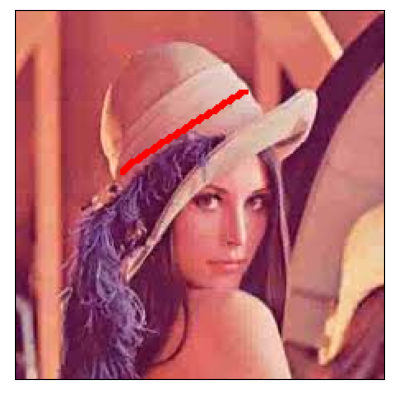

In [29]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a line
img = line_pixel(img, [99, 65], [50, 140], dense=10, color=(255, 0, 0), thickness=1)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [30]:
def box_pixel(img, pt1, pt2, pt3, pt4, dense, color, thickness):
    img = line_pixel(img, pt1, pt2, dense, color, thickness)
    img = line_pixel(img, pt2, pt3, dense, color, thickness)
    img = line_pixel(img, pt3, pt4, dense, color, thickness)
    img = line_pixel(img, pt4, pt1, dense, color, thickness)
    return img

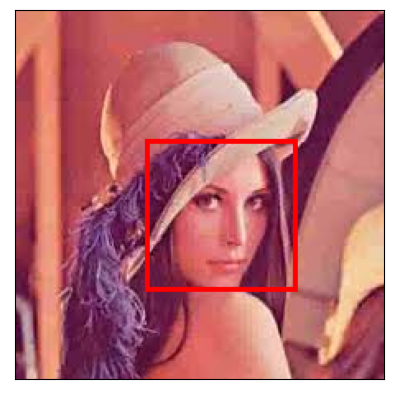

In [31]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a line
pt1 = [80, 80]
pt2 = [80, 170]
pt3 = [170, 170]
pt4 = [170, 80]
img = box_pixel(img, pt1, pt2, pt3, pt4, dense=10, color=(255, 0, 0), thickness=1)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

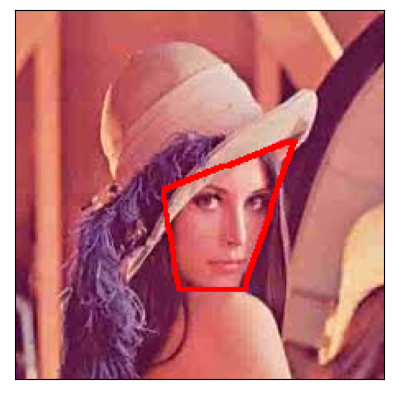

In [32]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a line
pt1 = [110, 90]
pt2 = [80, 170]
pt3 = [170, 140]
pt4 = [170, 100]
img = box_pixel(img, pt1, pt2, pt3, pt4, dense=10, color=(255, 0, 0), thickness=1)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()